In [92]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load Dataset

In [93]:
df = pd.read_csv('https://raw.githubusercontent.com/ssmresearch/hanminor/main/cars.csv')
df.shape

(74, 10)

# Analysis Data

In [94]:
df.describe()

,price,mileage,repair,headspace,trunkspace,weight,length,turningcircle,gear_ratio
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,6165.256757,8.518919,3.391892,7.483108,385.189189,1358.756757,469.831081,12.095000,3.014865
std,2949.495885,2.314201,0.962553,2.114987,119.767317,349.737105,55.665850,1.342261,0.456287
min,3291.000000,4.800000,1.000000,3.750000,140.000000,792.000000,355.000000,9.450000,2.190000
25%,4220.250000,7.200000,3.000000,6.250000,287.000000,1012.500000,425.000000,10.980000,2.730000
50%,5006.500000,8.000000,3.000000,7.500000,392.000000,1435.500000,481.250000,12.200000,2.955000
75%,6332.250000,9.900000,4.000000,8.750000,469.000000,1620.000000,509.375000,13.120000,3.352500
max,15906.000000,16.400000,5.000000,12.500000,644.000000,2178.000000,582.500000,15.560000,3.890000


In [95]:
y_data = df['origin']
x_data = df.drop(columns=['origin'])
x_data

,price,mileage,repair,headspace,trunkspace,weight,length,turningcircle,gear_ratio
0,4099.0,8.8,3.0,6.25,308.0,1318.5,465.0,12.20,3.58
1,4749.0,6.8,3.0,7.50,308.0,1507.5,432.5,12.20,2.53
2,3799.0,8.8,3.0,7.50,336.0,1188.0,420.0,10.68,3.08
3,4816.0,8.0,3.0,11.25,448.0,1462.5,490.0,12.20,2.93
4,7827.0,6.0,4.0,10.00,560.0,1836.0,555.0,13.12,2.41
...,...,...,...,...,...,...,...,...,...
69,7140.0,9.2,4.0,6.25,336.0,972.0,430.0,10.98,3.74
70,5397.0,16.4,5.0,7.50,420.0,918.0,387.5,10.68,3.78
71,4697.0,10.0,4.0,7.50,420.0,868.5,387.5,10.68,3.78
72,6850.0,10.0,4.0,5.00,448.0,895.5,390.0,10.98,3.78


## Normalization

In [96]:
from sklearn.preprocessing import normalize

x_data = normalize(x_data, norm='max', axis=0)

## Feature Corr analysis

In [97]:
combine = pd.DataFrame(x_data)
combine["origin"] = y_data
combine['origin'] = combine['origin'].apply(lambda x: 1 if 'usa' in x else 0)
li = list(df.columns[1:])
li.append(df.columns[0])
combine.columns = li
combine

,price,mileage,repair,headspace,trunkspace,weight,length,turningcircle,gear_ratio,origin
0,0.257701,0.536585,0.6,0.5,0.478261,0.605372,0.798283,0.784062,0.920308,1
1,0.298567,0.414634,0.6,0.6,0.478261,0.692149,0.742489,0.784062,0.650386,1
2,0.238841,0.536585,0.6,0.6,0.521739,0.545455,0.721030,0.686375,0.791774,1
3,0.302779,0.487805,0.6,0.9,0.695652,0.671488,0.841202,0.784062,0.753213,1
4,0.492078,0.365854,0.8,0.8,0.869565,0.842975,0.952790,0.843188,0.619537,1
...,...,...,...,...,...,...,...,...,...,...
69,0.448887,0.560976,0.8,0.5,0.521739,0.446281,0.738197,0.705656,0.961440,0
70,0.339306,1.000000,1.0,0.6,0.652174,0.421488,0.665236,0.686375,0.971722,0
71,0.295297,0.609756,0.8,0.6,0.652174,0.398760,0.665236,0.686375,0.971722,0
72,0.430655,0.609756,0.8,0.4,0.695652,0.411157,0.669528,0.705656,0.971722,0


In [98]:
combine.corr()

,price,mileage,repair,headspace,trunkspace,weight,length,turningcircle,gear_ratio,origin
price,1.000000,-0.468597,0.036533,0.114506,0.314332,0.538611,0.431831,0.309834,-0.313661,-0.048719
mileage,-0.468597,1.000000,0.372370,-0.413803,-0.581585,-0.807175,-0.795779,-0.718919,0.616177,-0.393397
repair,0.036533,0.372370,1.000000,-0.131282,-0.136233,-0.377479,-0.343889,-0.471236,0.402628,-0.599286
headspace,0.114506,-0.413803,-0.131282,1.000000,0.662011,0.483456,0.516295,0.424303,-0.377852,0.293853
trunkspace,0.314332,-0.581585,-0.136233,0.662011,1.000000,0.672206,0.726596,0.600923,-0.508665,0.359435
weight,0.538611,-0.807175,-0.377479,0.483456,0.672206,1.000000,0.946009,0.857381,-0.759258,0.592830
length,0.431831,-0.795779,-0.343889,0.516295,0.726596,0.946009,1.000000,0.864068,-0.696383,0.570198
turningcircle,0.309834,-0.718919,-0.471236,0.424303,0.600923,0.857381,0.864068,1.000000,-0.676387,0.631160
gear_ratio,-0.313661,0.616177,0.402628,-0.377852,-0.508665,-0.759258,-0.696383,-0.676387,1.000000,-0.706726
origin,-0.048719,-0.393397,-0.599286,0.293853,0.359435,0.592830,0.570198,0.631160,-0.706726,1.000000


<Axes: >

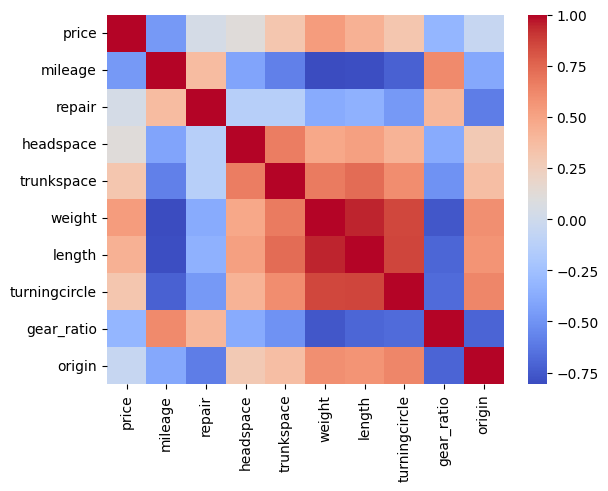

In [99]:
sns.heatmap(combine.corr(), cmap='coolwarm')

# Datasplit

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.values, test_size=0.2)
print(x_train.shape, x_test.shape)

(59, 9) (15, 9)


# Train

In [101]:
# find best K
for _k in range(1, 20):
    _model = KNeighborsClassifier(n_neighbors=_k)
    _model.fit(x_train, y_train)
    _y_predict = _model.predict(x_test)
    print((_k, sum(_y_predict == y_test)), end=', ')

(1, 14), (2, 14), (3, 14), (4, 13), (5, 14), (6, 14), (7, 15), (8, 14), (9, 14), (10, 14), (11, 15), (12, 14), (13, 14), (14, 14), (15, 15), (16, 14), (17, 15), (18, 15), (19, 15), 

In [106]:
k = 7

In [107]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

# Evaluate

In [108]:
from sklearn.metrics import classification_report

In [109]:
y_predict = model.predict(x_train)
print(classification_report(y_predict, y_train))

              precision    recall  f1-score   support

       other       1.00      0.83      0.90        23
         usa       0.90      1.00      0.95        36

    accuracy                           0.93        59
   macro avg       0.95      0.91      0.93        59
weighted avg       0.94      0.93      0.93        59



# Possible Improvement

1. Increase the train data size
2. Use a more advanced model (example: Neural network model)